In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [3]:
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)



In [5]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [8]:
df = df[df['Age'] <= 100]


In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']


In [10]:
print(df['FamilySize'])

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64


In [11]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)



In [12]:
print(df[['Age', 'Fare']].describe())


              Age        Fare
count  891.000000  891.000000
mean    29.699118   32.204208
std     13.002015   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     29.699118   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


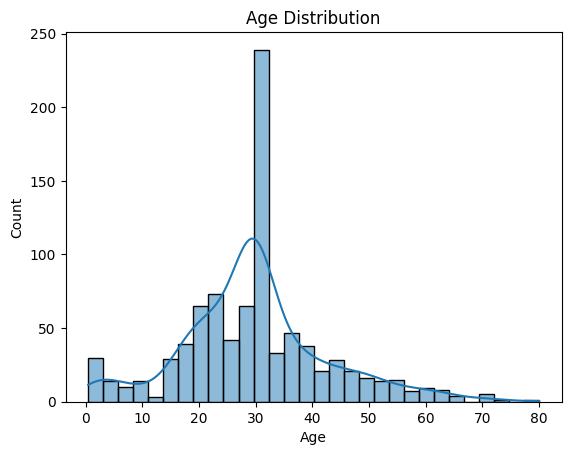

In [13]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()



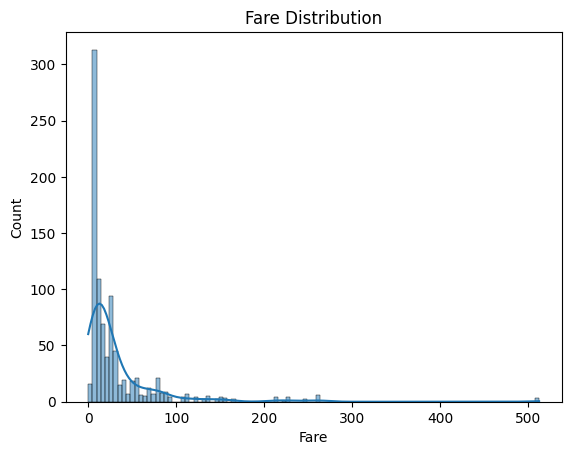

In [14]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


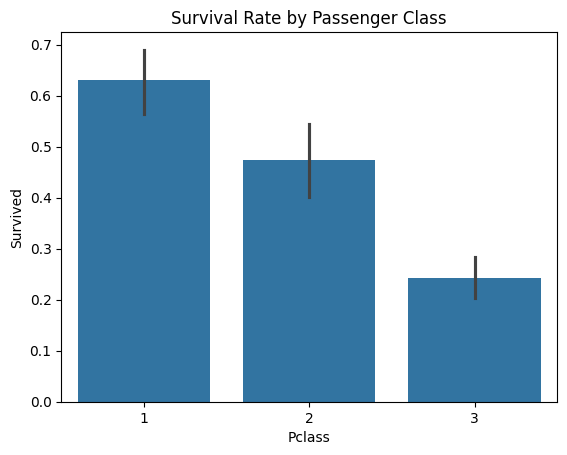

In [15]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()



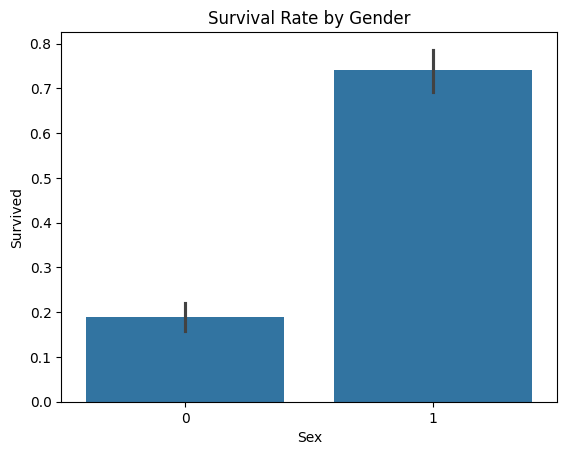

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()